# Recording of class
Background: people join from Americas/East Asia

Solution: recording of class
- Will be put on secret youtube links - not searchable
- Delete mid June

Consent: via poll

# Session 4:
## Unsupervised ML and algorithm audits
*Andreas Bjerre-Nielsen*

# Agenda
1. [Unsupervised learning](#Unsupervised-learning)
  1. [Principal components](#Principal-components)
  1. [Latent Direchlet Allocation](#Latent-Direchlet-Allocation)  
  1. [Clustering techniques](#Clustering-techniques)
1. [Algorithmic audits](#Algorithmic-audits)
  1. [Transparency](#Transparency)
  1. [Fairness](#Fairness)

# Unsupervised learning

## Learning problems
How does **unsupervised** learning differ from supervised?

- Supervised learning uses target variable, $y$, unsupervised does not

Examples of method: 
- Principal Components Analysis (PCA): **Unsupervised** method to represent data in independent vectors according to order of importance
- Linear Discriminant Analysis: similar to PCA but **supervised** - representations is found according to target $y$

## Learning problems
Why should we care about **unsupervised**?

- Can be combined with supervised in many ways to provide very powerful representations of data
- Supervised learning can happen faster if we know structure of the data e.g. from using unsupervised. 


## Dimensionality reduction
Many datasets have enormous feature spaces
(i.e. many dimensions)
- Often there is high
correlation between features
- Goal: represent data
in fewer features
without losing too much
variance
- Useful and common in applied micro

Methods: dimensionality reduction

Examples of techniques:
- Principal Components Analysis (PCA)
- Latent Dirichlet Allocation (LDA)

## Dimensionality reduction

Why should we use dimensionality reduction?

Advantages:
1. Often enables visualization of very highdimensional data
2. Less data to store
3. Can improve predictive performance by
reducing curse of dimensionality problems

Disadvantages:
1. Features are harder/impossible to interpret (transparency)
2. We lose some variance/information

## Clustering

Suppose we want to assign our data into latent classes, many ways parametric and non-parametric. 
- Not very common in economics
- Two overall approaches
  - Parametric: K-Means, C-Means, Gaussian mixture, ...
    - Choosing number of cluster
  - Non-parametric: DBSCAN, Linkage-based
    - Choosing distance threshold

# Principal components

## PCA 

Goal: want to compute the $K\times K$ matrix $W$ such $z=xW$ 
- $z_1,..,z_K$ are independent and each component explains as much variation as possible

Solution: eigenvectors for covariance matrix of standardized features


## PCA 

How does the components from PCA look? Example two principal components:

<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch05/images/05_01.png' alt="Drawing" style="width: 600px;"/></center>

(Image from [Raschka & Mirjalili, 2017](https://github.com/rasbt/python-machine-learning-book-2nd-edition))

## PCA application


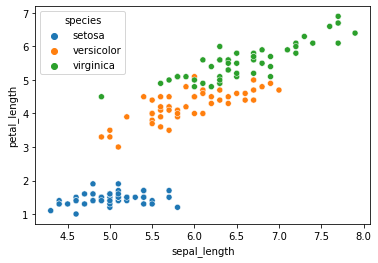

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

iris = sns.load_dataset('iris')
sns.scatterplot(x=iris.sepal_length, y=iris.petal_length, hue=iris.species)
X = iris.iloc[:, :4].values 
y = np.where(iris.species=='setosa', 1, -1) # convert to 1 for setosa, -1 for versicolor

## PCA application
Manual computation

In [101]:
from sklearn.preprocessing import StandardScaler

# compute eigen vectors
X_scale = StandardScaler().fit_transform(X)
eig_vals, eig_vecs = np.linalg.eig(X_scale.T.dot(X_scale))

# sort eigenvectors
eig_vals, eig_vecs = tuple(zip(*sorted(zip(eig_vals, eig_vecs), 
                                       key=lambda t: t[0], reverse=True)))

W_manual = np.array(eig_vecs)
Z_manual = X_scale.dot(W_manual)

## PCA application
Implementation as a pipe

In [103]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

pipe_pca = make_pipeline(StandardScaler(), PCA(n_components=4))
Z_pipe = pipe_pca.fit_transform(X)
W_pipe = pipe_pca.steps[1][1].components_.T

## PCA implementation

How many principal components should we use? Two ways:
- Choose as hyperparameter in supervised
- Choose using "elbow" method:


<center><img src='https://github.com/rasbt/python-machine-learning-book-2nd-edition/raw/master/code/ch05/images/05_02.png' alt="Drawing" style="width: 500px;"/></center>

(Image from [Raschka & Mirjalili, 2017](https://github.com/rasbt/python-machine-learning-book-2nd-edition))

# Latent Direchlet Allocation



## LDA - background

Situation: we have many documents that we want to sort 

Idea: infer belonging to different topics (latent components) of document

Why? 
- Measure broadly the content of text.
  - E.g. what are the topic people discussing on social media, parlament 
  - Powerful if combined with event analysis

## LDA - background

Situation: we have many documents that we want to sort 

Idea: infer belonging to different topics (latent components) of document

How is this useful? 


- Measure broadly the content of text.
  - E.g. what are the topic people discussing on social media, parlament 
  - Powerful e.g. if combined with event causal analysis, e.g. event studies

## LDA - background

How is this even possible?

A simple way to convert documents to vectors
- Preprocess data, e.g. removing: . , ! ?
- Count instances of different words
- Data structure in matrix form:
  - Documents are rows
  - Columns count instances of trimmed words, e.g. *evaluat*

## LDA - mechanics

Works as follows. Remind you of other model?

## LDA - mechanics

We will not go deep with this. Basic intuition:
- Assume words are generated from latent components, each component has word frequency
- Estimating relies on assuming Diriclet distribution and iterative optimizing
  - Check out [this blogpost](https://towardsdatascience.com/light-on-math-machine-learning-intuitive-guide-to-latent-dirichlet-allocation-437c81220158) with an intuitive explaination

## LDA - example application

[Shiller (2017)](https://doi.org/10.1257/aer.107.4.967) use the method to investigate economic narratives

- Use it to define around ten core economic narratives
  - e.g. economic crises and housing boom/bust

## LDA - example application

So how can this be used in economic research?

- [Hansen, McMahon, & Prat (2018)](https://doi.org/10.1093/qje/qjx045) investigates whether minutes from central bank meetings should be public. This is the "transparency effect".
- Two hypotheses:
  - Negative: Strategic career concerns of public leads to more conformism and officials will not be aggresive enough
  - Positive: Discplinating effect due to accountability
- Approach: 
  - Investigate meeting minutes - who speaks about what
  - Combine natural experiment with computational linguistics
- Evidence for both effects but disciplining effect dominates
   

## Non-linear dimensionality reduction

Much progress e.g. t-SNE: use pairwise distance between observations in features to create low dimensional map using Kullbeck-Leibler divergence. Example MNIST:
<center><img src='https://live.staticflickr.com/4524/26620503329_568554752f_b.jpg' alt="Drawing" style="width: 450px;"/></center>

(By [Kyle McDonald](https://www.flickr.com/photos/kylemcdonald/), licensed under CC-BY-2.0)

# Clustering techniques

## K-means
Fix cluster count K and inialize initial centroids/means $\mu_1,..,\mu_K\in \mathbb{R}_d$.

Iteratively update the centroids as follows:

1. Let each observation $i$ to centroid $j\in\{1,..,K\}$ that minimizes Euclidian distance between $x_i$ and cluster $j$. Denote this by $w_{ij}=1$; otherwise $w_{ij}=0$.
  - Corresponds to minizing $SSE=\sum_{i=1}^{n}\sum_{j=1}^{K}w_{ij}(x_i-\mu_j)^2$
2. Update the position of centroids as the mean of its members.
 

## DBSCAN
Another algorithm that works by setting a **distance threshold** (aka radius) $\varepsilon$ and **MinPts**.
- Very useful - look for patterns in registry data at date level, such as health visits
- I have used method in research on human mobility: identify stop locations of where people are for longer time [(Cuttone et al., 2014)](https://doi.org/10.1145/2638728.2641283)
- Note: could be applied after using non-linear projection, e.g. on MNIST data


## DBSCAN
Another algorithm that works by setting a **distance threshold** (aka radius) 
Before algorithm is run, each point sample point as categorized as one of three: 
- **Core** point if at least a specified number (**MinPts**) of neighboring points fall within the specified radius $\varepsilon$
- A **border** point is a point that has fewer neighbors than **MinPts** within $\varepsilon$,  but lies within the $\varepsilon$ radius of a core point
- All other points that are neither core nor border points are considered **noise** points

## DBSCAN
The categorization can be depicted as follows:
<center><img src='fig/DBSCAN/DBSCAN_raschka.png' alt="Drawing" style="width: 500px;"/></center>

(Image from [Raschka & Mirjalili, 2017](https://github.com/rasbt/python-machine-learning-book-2nd-edition))

## DBSCAN

With categorization of points, DBSCAN proceeds in the following procedure:
1. Form a separate cluster for each core point or ***connected*** group of core points (core points are connected if they are no farther away than $\varepsilon$ ).
2. Assign each border point to the cluster of its corresponding core point.

Note - border points may have overlapping clusters. 

## Conclusion - unsupervised

New and very powerful unsupervised methods to work with data:
- Auto-encoders to represent data unsupervised using neural networks
- Development of GPT-3, BERT which can generate human-level text in many subjects (although no understanding of what it writes about) 
- Similar tools could come for computer vision soon

Example of application
- Bjerre-Nielsen and others: apply to registry data to reduce complex life trajectories

## Conclusion - unsupervised

Emerging literature on text as data. Many other economic applications of text data
- Great overview in paper ["Text as Data"](https://doi.org/10.1257/jel.20181020) 
- Macroeconomic research is having a new quantiative branch
  - [Effects on FOMC minutes on interest rate](https://doi.org/10.1016/j.jinteco.2015.12.008)
  - Measuring sentiment implicitly from text, e.g. from [economic news](https://doi.org/10.1016/j.jeconom.2020.07.053), rather than using surveys
- Micreconomics
  - Political speech: [measuring polarization through choice of words in speech](https://doi.org/10.3982/ECTA16566)
  - Coordination in games? Applications in economic experiments?

# Algorithmic audits

## Motivation

Some deep questions about applying algorithms:
- Are algorithms more or less fair than humans?
- How can we hold the designers and implementers accountable?
- How should we regulate algorithms?
  - What input data should they be allowed to use?
  - What targets should they be allowed to use?
  


## Motivation

When presented with the same information we react different
- Example: judges react different to identical evidence ([Austin and Williams, 1977](https://doi.org/10.2307/1142852))
  - Extreme differences in decision on crime penalty


## Motivation

Problem, part of these differences comes from large bias for selecting Caucasian applicants

Evidence from resume audit studies: 
- Sending out resumes, keeping job resumes fixed [(Bertrand & Mullainathan, 2004)](https://doi.org/10.1257/0002828042002561)
  - Including resumes explicitly controls for "statistical discrimation" story 
  - Also hold for in-person audits [(Pager et al., 2009)](doi/10.1177/000312240907400505)
- How does this relate to bias in algorithms? Parts of discrimation may be merit.

## Motivation
Can we use algorithms to automate decision?
- Could have identical decisions given identical evidence. **Problems?**

## Motivation
Can we use algorithms to automate decision?
- Could have identical decisions given identical evidence. **Problems?**

We may require that our algorithm fulfills basic properties: 
- 1) fairness/ethical, 2) transparency/accountability
- Often known under the acronym FATE

## Motivation
A great case for the value of applying algorithm is [Kleinberg et al. (2018, QJE)](https://doi.org/10.1093/qje/qjx032):
- Study problem of bail decision (10 mill. annually in US): to relase or to jail 
  - only pure prediction problem - risk of new crime or fleeing trial
  - Overcomes problem of counterfactual policy evaluation - exploit quasi-random assignment
- Problem in essence: who to jail and not using available data
- Show that machines vastly outperform humans in most decisions, even when accouting for unobserved data
  - E.g. most risky are jailed as much as they should, but least risky are

# Transparency

## Transparency - background



Algorithms may become *black boxes*: they make great predictions, but we don't know how..
- We have seen complex supervised models can outperform simpler (e.g. linear, tree)
- Lack of transparency is in particular counter against for public administration
  - May make it impossible for accountability 
  - E.g. to hide manipulation and corruption
  

## Transparency - solutions

Transparency can be addressed in a number of ways
- Surrogate modelling - fit a simple and explainable model on predictions of complex model
  - Can be done globally/locally (kernel regression)
  - Can interpret decision of the complex model 
  - Problem - may miss important non-linearities
- Model agnostic approaches:
  - ICE: individual conditional expectation 
  - SHAP: use the shapley value - features evaluated as agents in cooperative game theory - contribution to prediction [(Lundberg and Lee, 2017)](https://papers.nips.cc/paper/2017/hash/8a20a8621978632d76c43dfd28b67767-Abstract.html)

# Fairness

## Motivation for fairness

Hiding within algorithms may also be systematic biases in predictions
- e.g. by ethnicity, gender, socioeconomic groups
- example of risk scores: recidivism, child abuse, school dropout, tax fraud, health

If algorithms have negative consequences, then ethical concerns of application

## Fairness motivation

In 2016 a couple of [journalists at ProPublica audited models for predicting recidivism called COMPAS](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing): 
- Found for COMPAS that among defendants who *did not commit future crime* predicted risk varied by ethnicity:
  - African-American had higher predicted risk score than Caucasian
 
- Study caused huge controversy

## Fairness motivation

Even unsupervised algorithms in basic tech may be susceptible to bias:
- Natural language processing systems may be biased in understanding of gender roles: women are homemakers, men are computer programmers [(Bolukbasi et al., 2017)](https://papers.nips.cc/paper/6228-man-is-to-computer-programmer-as-woman-is-to-homemaker-debiasing-word-embeddings.pdf)
- Facial recognition make more mistakes against women and African-American [(Boulamwani & Gebru, 2018)](https://proceedings.mlr.press/v81/buolamwini18a/buolamwini18a.pdf)
  - Critical in medicine and usability of technology
  - Underlying problem: sample contained mostly male Caucasian people

## Fairness criterions

**Statistical parity**

Satisifed if marginal likelihood of the predicted classes are constant across protected group categories, $G$. 
<br>

$$\mathbb{P}[Y=1|G=b]=\mathbb{P}[Y=1|G=w]$$
- Example: men vs. women / black vs. white have same dropout ratio in school, likelihood of committing crime (depending on target)
- Consequences: In criminal context, may jail women who pose little or no public safety risk so that the same proportions of men and women are released on probation.
- Can we decompose into   more sensible alternatives?

## Fairness criterions

**Well calibrated**

- Like statistical parity, but conditional on risk score:
<br>

$$\mathbb{P}[Y=y|S=s,G=a]=\mathbb{P}[Y=y|S=s,G=b],\quad\forall a,b\in \mathcal{G}$$

- [Chouldechova (2016)](https://arxiv.org/pdf/1610.07524.pdf) shows COMPAS satifies calibration.

<center><img src='fig/fairness/COMPAS_predict_calibration.png' alt="Drawing" style="width: 600px;"/></center>


## Fairness criterions

**Equalized odds**

Inverse of well-calibrated - score condition on outcome
<br>

$$\mathbb{P}[S=s|Y=y,G=a]=\mathbb{P}[S=s|Y=y,G=b],\quad\forall a,b\in \mathcal{G}$$

- [Chouldechova (2016)](https://arxiv.org/pdf/1610.07524.pdf) shows COMPAS does not satify equalized odds.

<center><img src='fig/fairness/COMPAS_predict_equalized_odds.png' alt="Drawing" style="width: 500px;"/></center>


## Fairness criterions

The equalized odds issue can be dealt with algorithmically to debias the predictions. 

- [Zafar et al. (2015)](https://arxiv.org/pdf/1507.05259.pdf) outlines how fixing corresponds to optimization under constraints
- [Hardt et al. (2016)](https://arxiv.org/abs/1610.02413) demonstrates how to achieve equalized odds in prediction

- What problems could arise? 
  - Issue: may not be blind to using proxies of protected group
  - Deeper issues?

## Fairness criterions

The two criteria are in fact compatible [(Kleinberg, Mullainathan & Raghavan, 2016)](https://arxiv.org/pdf/1609.05807.pdf) only if base rates are the same (e.g. men and women are equally likely to commit crime)

- Consequence: fixing equalized odds will cause problems with calibration

- Why? Basic application of Bayes theorem.

- Holds even for weaker version of Equalized Odds [(Kleinberg et al., 2017)](https://arxiv.org/pdf/1709.02012.pdf)

## Fairness and welfare

[Kleinberg et al. (2018)](https://doi.org/10.1257/pandp.20181018) presents a broader view of algorithms
- Study "selection problem" - which candidates to select from group
- We can separate prediction from utility/welfare
  - Efficiency/merit: preferences for lower predicted outcome, e.g. risk of school dropout or recidivism
  - Equity/diversity: preferences for less extreme sociodemographic distribution
- Example: who to admit at a school
  - Diversity can help us set quotas by sociodemographic groups, merit choose who within groups to admit

## Fairness in welfare

[Kleinberg et al. (2018)](https://doi.org/10.1257/pandp.20181018) shows that debiasing algoirithms can lower efficiency for constant equity - see tradeoff in Pareto frontier:

<center><img src='fig/fairness/COMPAS_blinding.png' alt="Drawing" style="width: 500px;"/></center>

## Fairness and econometrics

What data should algorithms be allowed to use:

- [Rambachan and Roth (2019)](https://arxiv.org/abs/1909.08518) - investigates, "bias in, bias out" hypothesis that algorithms trained on biased human decision data will be biased
  - Find that bias human decision will be reversed by algorithms 
  - Needs a few assumptions: unobserved information for human selecting; discrimination in choices
- [Rambachan et al. (2020)](https://doi.org/10.1257/pandp.20201036) argues that choice of target is key measurement error problems
  - Using proxy target instead of true target may create problems
    - E.g. health costs of treatment vs. health condition 
    - Imbalance between private incentives and social good
 

